In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [3]:
train.drop(['id', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis = 1, inplace = True)

In [4]:
target = train['Exited']
train.drop('Exited', axis = 1, inplace = True)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train = pd.DataFrame(scaler.fit_transform(train))
target = pd.DataFrame(scaler.fit_transform(target.values.reshape(-1, 1)))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, y_test = train_test_split(train,target, test_size = 0.3, random_state = 0)

In [7]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

RFC.fit(X_train, Y_train)

y_pred = RFC.predict(X_test)

/tmp/ipykernel_19/1602739209.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(X_train, Y_train)


In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.8488012764840136


array([[36878,  2168],
       [ 5318,  5147]])

In [9]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

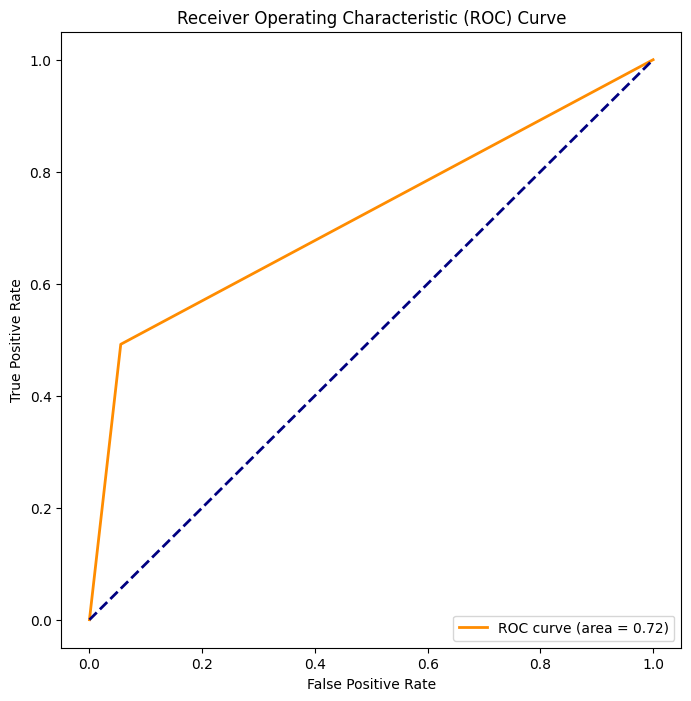

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [11]:
test = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")
test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [12]:
solution = pd.DataFrame()
solution['id'] = test['id']

In [13]:
test.drop(['id', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis = 1, inplace=True)

In [14]:
test = pd.DataFrame(scaler.fit_transform(test))
test

,0,1,2,3,4,5,6,7
0,0.472,0.067568,0.2,0.000000,0.333333,0.0,1.0,0.804903
1,0.666,0.378378,0.2,0.000000,0.000000,1.0,0.0,0.362723
2,0.612,0.216216,0.7,0.000000,0.333333,1.0,0.0,0.694419
3,0.662,0.243243,0.8,0.000000,0.000000,1.0,0.0,0.569654
4,0.804,0.270270,1.0,0.483318,0.000000,1.0,0.0,0.697164
...,...,...,...,...,...,...,...,...
110018,0.440,0.148649,0.7,0.462737,0.000000,1.0,1.0,0.740451
110019,0.450,0.243243,0.4,0.709581,0.000000,1.0,1.0,0.210871
110020,0.724,0.175676,0.2,0.000000,0.333333,1.0,0.0,0.081387
110021,0.718,0.189189,0.3,0.000000,0.000000,1.0,1.0,0.794101


In [15]:
RFC.fit(train, target)
probabilities = RFC.predict_proba(test)[:, 1]
rounded_probabilities = np.round(probabilities, 1)
solution['Exited'] = rounded_probabilities 
solution

/tmp/ipykernel_19/1702072242.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(train, target)


,id,Exited
0,165034,0.0
1,165035,0.8
2,165036,0.0
3,165037,0.2
4,165038,0.2
...,...,...
110018,275052,0.0
110019,275053,0.1
110020,275054,0.0
110021,275055,0.1


In [16]:
solution.to_csv('submission.csv', index=False)
